In [1]:
import torch
import os
import matplotlib.pyplot as plt
if not os.path.exists('.\\data\\'):
    new_directory_path = "..\\..\\"
    os.chdir(new_directory_path)

from src.data.parsers import CocoFreeView
from src.model.rope_positional_embeddings import RopePositionEmbedding
from src.model.blocks import apply_rope

In [2]:
coords = torch.empty((1, 100, 2)).uniform_(0, 1)

In [3]:
pos = RopePositionEmbedding(
        embed_dim = 480,
        num_heads = 8,
        base = 100,
        min_period = None,
        max_period = None,
        normalize_coords = "separate",
        shift_coords = None,
        jitter_coords = None,
        rescale_coords = 2,
        dtype = coords.dtype,
        device = coords.device)


In [4]:
def compute_similarity(idx, path_features, img_features):
    path_feature = path_features[0,0, idx, :].unsqueeze(-2).transpose(-2, -1)
    sim = img_features @ path_feature
    return sim

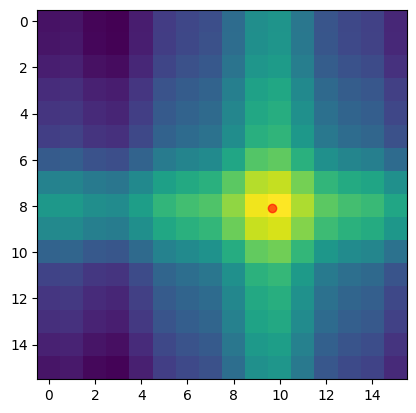

In [15]:
import matplotlib.pyplot as plt
import random
rope_src, img_rope = pos(traj_coords = coords, patch_res = (16, 16))
path_features = torch.empty((1, 1, 1, 60)).uniform_(-1, 1)
path_exp = path_features.expand(1, 1, 100, 60)
path_exp = path_exp / (path_exp.norm(dim=-1, keepdim=True) + 1e-8)
img_features = path_features.clone().expand(1, 1, 256, 60)
img_features = img_features / (img_features.norm(dim=-1, keepdim=True) + 1e-8)
roped_path, roped_img = apply_rope(path_exp, img_features, rope_src, img_rope)
# Scatter random coords using matplotlib
rand_idx = random.randint(0, coords.shape[1] - 1)
x = coords[0, rand_idx, 0].cpu().numpy()*16 - .5
y = coords[0, rand_idx, 1].cpu().numpy()*16 - .5
sim = compute_similarity(rand_idx, roped_path, roped_img)
sim.view(16,16)
plt.scatter(x, y, c='red', alpha=0.6)
plt.imshow(sim.view(16,16))
plt.show()




In [81]:
test = sim.view(16,16)
print(test[10,10], test[8,9])
print(x,y)

tensor(0.9182) tensor(0.9903)
10.48795 10.016417
